In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def city_converter(x):
    if (x == "iq"):
        return "Iquitos"
    elif (x == "sj"):
        return "San Juan"
    return None

In [3]:
dfFeatures = pd.read_csv("../Dataset/Dengue/dengue_features_train.csv",
                         converters = {"city": city_converter})
dfFeatures["city"] = dfFeatures["city"].astype("category")
dfFeatures.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,San Juan,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,San Juan,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,San Juan,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,San Juan,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,San Juan,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
dfLabels = pd.read_csv("../Dataset/Dengue/dengue_labels_train.csv",
                       converters = {"city": city_converter})
dfLabels["city"] = dfLabels["city"].astype("category")
dfLabels.head()

,city,year,weekofyear,total_cases
0,San Juan,1990,18,4
1,San Juan,1990,19,5
2,San Juan,1990,20,4
3,San Juan,1990,21,3
4,San Juan,1990,22,6


In [5]:
df = dfFeatures.merge(dfLabels, on = ["city", "year", "weekofyear"])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,San Juan,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,San Juan,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,San Juan,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,San Juan,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,San Juan,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [6]:
# Segmento las semanas del año en bins de 4  (casi un mes)
maxWeekOfYear = df["weekofyear"].max()
groupWeeksBy = 4
df["bins"] = pd.cut(df["weekofyear"],
                    bins = range(1, maxWeekOfYear + 1, groupWeeksBy),
                    labels=[f'{l}-{l+groupWeeksBy-1}'
                            for l in range(1, maxWeekOfYear - groupWeeksBy + 1, groupWeeksBy)])

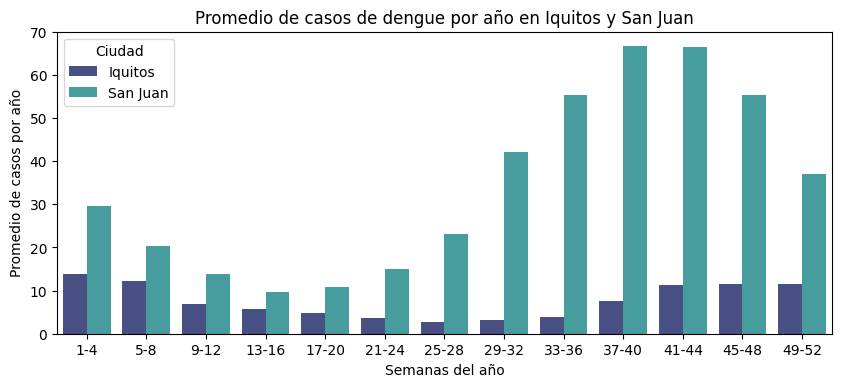

In [7]:
plt.subplots(dpi = 100, figsize = (10, 4))

bar = sns.barplot(data = df.groupby(["city", "bins"]).mean().reset_index(),
                  x = "bins", y = "total_cases", hue = "city", palette = "mako")
bar.set(xlabel = "Semanas del año", ylabel = "Promedio de casos por año",
        title = "Promedio de casos de dengue por año en Iquitos y San Juan")
bar.legend(title = "Ciudad", loc = "upper left")

plt.show()

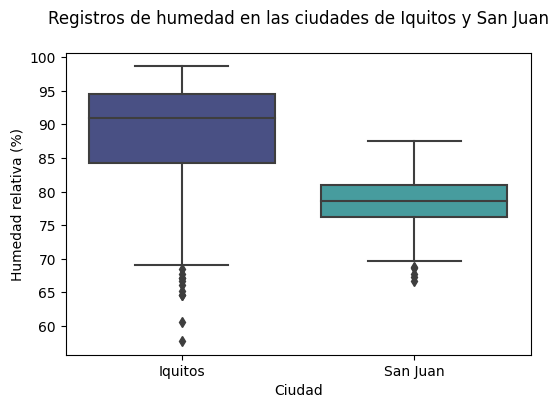

In [8]:
plt.subplots(dpi = 100)

boxplot = sns.boxplot(data = df, x = "city", y = "reanalysis_relative_humidity_percent", palette = "mako")
boxplot.set(xlabel = "Ciudad", ylabel = "Humedad relativa (%)",
            title = "Registros de humedad en las ciudades de Iquitos y San Juan\n")
plt.show()